In [16]:
import aocd
from aocd.models import Puzzle
day = 9
year = 2021
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [17]:
import numpy as np
from scipy.signal import convolve2d
from collections import Counter

In [18]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(100,
 ['9656799999432123456997667932987634348988901234569972123973212398999898743234578999878965345989412345',
  '8746789898543235689879457891396521236567892347698763299865101987898789652123459998767893239874323458',
  '7657896797654348798968346799987430123456943458987654987654219876747688943435698967656789098765434567',
  '8767945698967859987653235678976521234567894569998785698765345965434567894566987654345678999886548698',
  '9878936989898967998842123799988432345678965679989976789876459876123998999879876543234567999998657789',
  '9989759876789899987651012989999654676789896899877899893987898765017899997989977532123456789879767899',
  '9899898765698789998763123467898765699998789998766568932998989854146789876598765431012345678969878989',
  '9787987974545698999873234578989876987899678987653456949899876543235678995439876532123478989654989678',
  '7656896653432367897654348989678989876996589978321239898787987665366789989321987543234569996543294569',
  '6542985432101256789865457892569998765

In [19]:
test_data = """2199943210
3987894921
9856789892
8767896789
9899965678""".splitlines()

In [20]:
d = test_data
# d = data
dx = len(d[0])
dy = len(d)

height_map = np.zeros((dx, dy), dtype=np.int8)

for i in range(dx):
    for j in range(dy):
        height_map[i, j] = d[j][i]

In [21]:
kernels = []
kernels.append(np.array([[0, 1, 0], [0, -1, 0], [0, 0, 0]], dtype=np.float64))
kernels.append(np.array([[0, 0, 0], [1, -1, 0], [0, 0, 0]], dtype=np.float64))
kernels.append(np.array([[0, 0, 0], [0, -1, 1], [0, 0, 0]], dtype=np.float64))
kernels.append(np.array([[0, 0, 0], [0, -1, 0], [0, 1, 0]], dtype=np.float64))

# kernel
c2d = [convolve2d(height_map, kernels[i], mode='same', boundary='fill', fillvalue=10) > 0 for i in range(len(kernels)) ]
minimum = np.array(c2d).sum(axis=0) == 4


In [78]:
puzzle.answer_a = (height_map[minimum] + 1).sum()

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


In [25]:
len(height_map[minimum])

4

In [34]:
basin = np.zeros(height_map.shape)
for i, pos in enumerate(zip(*np.where(minimum))):
    x, y = pos
    basin[x, y] = i+1

In [27]:
kernels = []
kernels.append(np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64))
kernels.append(np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.float64))
kernels.append(np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]], dtype=np.float64))
kernels.append(np.array([[0, 0, 0], [0, 0, 0], [0, 1, 0]], dtype=np.float64))

for i in range(9):
    basin_new = np.array([convolve2d(basin, kernels[i], mode='same', boundary='fill', fillvalue=0) for i in range(len(kernels))] + [basin])
    basin = basin_new.max(axis=0)
    basin[height_map==9] = 0
#     break

In [28]:
basin.T

array([[1., 1., 0., 0., 0., 4., 4., 4., 4., 4.],
       [1., 0., 2., 2., 2., 0., 4., 0., 4., 4.],
       [0., 2., 2., 2., 2., 2., 0., 3., 0., 4.],
       [2., 2., 2., 2., 2., 0., 3., 3., 3., 0.],
       [0., 2., 0., 0., 0., 3., 3., 3., 3., 3.]])

In [174]:
basin.max()

206.0

In [175]:
basin_size = Counter(basin.astype(np.int32).flatten().tolist())
basin_size.pop(0)


2571

In [176]:
puzzle.answer_b = int(np.product(sorted(basin_size.values())[-3:]))

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 9! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [179]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

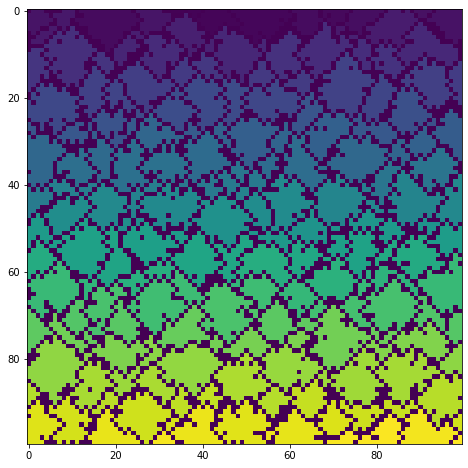

In [192]:
plt_basin = basin.copy()
plt_basin[plt_basin == 0] = 0
plt.imshow(plt_basin)
plt.savefig('basins.png')

In [12]:
from scipy.ndimage import generic_filter
height_map

array([[2, 3, 9, 8, 9],
       [1, 9, 8, 7, 8],
       [9, 8, 5, 6, 9],
       [9, 7, 6, 7, 9],
       [9, 8, 7, 8, 9],
       [4, 9, 8, 9, 6],
       [3, 4, 9, 6, 5],
       [2, 9, 8, 7, 6],
       [1, 2, 9, 8, 7],
       [0, 1, 2, 9, 8]], dtype=int8)

In [24]:
height_map[generic_filter(height_map, np.min, size=3) == height_map]

array([1, 5, 5, 0], dtype=int8)

In [42]:
f = basin.copy()
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

for i in range(9):
    new = generic_filter(f, np.max, footprint=kernel)
    new[height_map==9] = 0
    f = new
f.T

array([[1., 1., 0., 0., 0., 4., 4., 4., 4., 4.],
       [1., 0., 2., 2., 2., 0., 4., 0., 4., 4.],
       [0., 2., 2., 2., 2., 2., 0., 3., 0., 4.],
       [2., 2., 2., 2., 2., 0., 3., 3., 3., 0.],
       [0., 2., 0., 0., 0., 3., 3., 3., 3., 3.]])

In [36]:
basin.T

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.]])